<h1 style="text-align: center;" markdown="2">Effect of regulization and choice of model in deep learning's performance</h1>
<h3 style="text-align: center;font-weight= normal;">Phuc Le</h3>
<h3 style="text-align: center;font-weight= normal;">Mercer University</h3>
<h3 style="text-align: center;font-weight= normal;">lephuc66@gmail.com</h3>


<h2 style="text-align: center;" markdown="2">Abstract</h2>

The performance of an deep learning algorithm depends on how well the researchers choose the model, tune the hyper parameter, and apply regulization method to fit with the dataset. In this paper, I will only focus on the use of regulization method and the choice of model. In the first part,I will demonstrate the effect of applying regulization by using normal regularization and drop-out into normal deep learning algorithm. In the second part, I will compare the performance of 3 models : Batch Gradient Descent(BGD), Stochastic Gradient Descent(SGD),and Mini-Batch Gradident Descent(MBGD). Momentum and RMSprob will be in turn added to MBGD, which will significantly increase the accuracy of the program.

## 1. Introduction

The rise of interest about neural networks in both academia and public environment starts with a breakthrough in 2006, when Geoffrey Hinton published a well-recieved paper showing the effifency of an algorithm called "greedy layer-wise" pretraining _(Hinton et al.,2006)_. Another breakthrough come in the ImageNet competition, when Alex Krizhevsky, Ilya Sutskever,and Geoffrey Hinton achieved significant improvement in accuracy using Deep Convolutional Convolutional Networks _(Krizhevsky et al., 2012)_. The impressive performance of those algorithms compared to tradditional machine learning methods had not only attracted intention among researchers, but also in popular culture, under the term "deep learning". However, despite being a powerful tool, applying deep learning is an iterative process and cannot be generalized easily, as researchers have to find suitable hyperparameters and models for each dataset given. In the first part, by applying

## 2. Regulization

A big problems of Deep Learning models is overfitting, when the program tries too hard to fit the training set as much as possible, thus reduce the ability to generalize to the examples in dev and test set, which it has never seen. A standard way to avoid that is to apply *L2 regularization*, which involve modifying the cost function.

Normal cost function:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
Cost function using regularization:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Drop-out is another technique that is widely used in Deep Learning models to reduce overfitting. The main idea is it will randomly remove some neurons in each iteration.
<img src="images/dropout.png" style="width:750px;height:360px;">
<caption><center> <u> **Figure 1** </u>: **Dropout Illustration**<br> Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from overfitting”, JMLR 2014 </center></caption>

Drop-out is applied in both forward propagation and backward propagation phase. The weight of the nodes which have been removed will be distributed to those nodes that still remained. 

In this part, we will use a data set of points illustrate as below. Our goal is to divide the plane into red and blue spaces, where the points of respestive color is most likely to appear.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

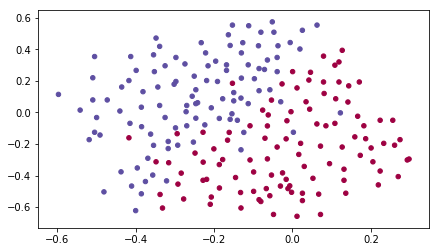

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Let's train the model without any regularization, and observe the accuracy on the train/test sets.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423239133


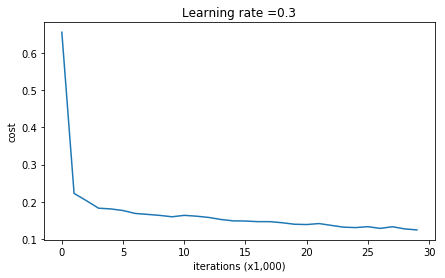

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


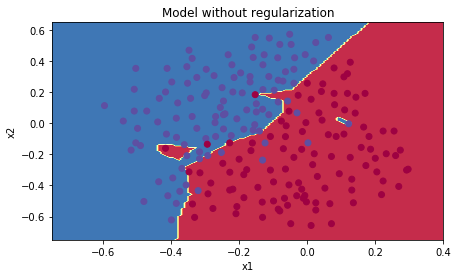

In [3]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

# The result
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Without any modification, we can achieve 94.7% accuracy on the training set and 91.5% on the test set. The red and blue spaces are scatttered, since the model try to match up with the traininging set.Now, we will apply regularization with *lambda* = 0.7 to the model.

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


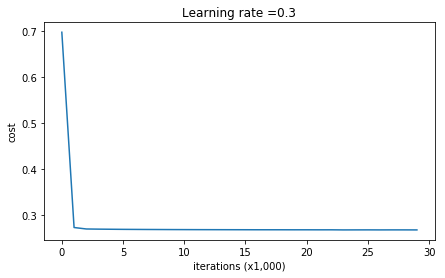

On the train set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


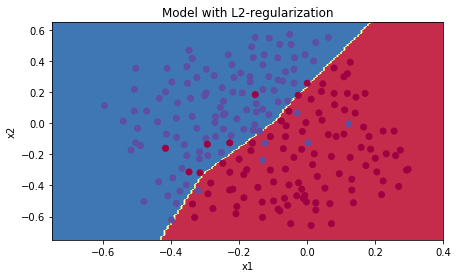

In [5]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Using the same model with regularization, we can achieve 1.5% increase in test set performance. The model now does not try to overfit the training set, but rather accept the loss of few mismatch points in order to increase generalization.
Finally, we will apply try applying to the model with keep_prob = 0.86

Cost after iteration 0: 0.6543912405149825


d:\Programming\Deep-Learning\reg_utils.py:228: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
d:\Programming\Deep-Learning\reg_utils.py:228: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


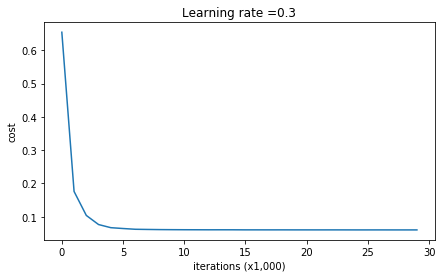

On the train set:


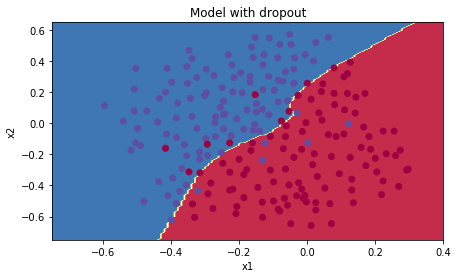

In [6]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)
print ("On the train set:")
#predictions_train = predict(train_X, train_Y, parameters)
#print ("On the test set:")
#predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

With dropout, the accuracy of the test set increases another 2% to 95%. Like regularization, the increase in accuracy in the test set come with the price with the decrease in training set.

## Reference
Hinton, G. E., Osdindero, S., and Teh, Y.(2006). A fast learning algorithm for deep belief net. _Neural Computation_, *18*, 1557 - 1554.

Krizhevsky, A., Sutskever, I., and Hinton, G. E.  ImageNet classification with deep convolutional neural net- works. _NIPS_, pp. 1106–1114, 2012.

Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from
overfitting”, JMLR 2014